In [6]:
#1. Start with an empty network with no occupied vertices. Let c = 0 be the number of clusters
#in the network initially. Choose at random an order in which the vertices will be added to
#the network.
#2. Add the next vertex in the chosen order, initially with no edges. This vertex is a cluster in
#its own right, so increase c by one and label the vertex with label c to indicate which cluster
#it belongs to. Also make a note that cluster c has size 1.

import random
import math
import matplotlib.pyplot as plt

N = 10**4
prob = 0.0002     #so the number of edges is prob*N^2/2
edge_num = math.floor(prob*N*(N-1)/2)
#orders = list(range(edge_num))
#random.shuffle(orders)

# initiate network
unoccupied = set()
occupied_nodes = set()
ptrs = [-(1+N)]*N
for i in range(edge_num):
      node1 = random.randrange(N);
      node2 = random.randrange(N);
      if node1 != node2:
          unoccupied.add((node1,node2))
      else:
          i =- 1

print("Graph created")
#print(orders)
#print(edge_num)
#print(unoccupied)
edge = random.sample(unoccupied,1)

Graph created


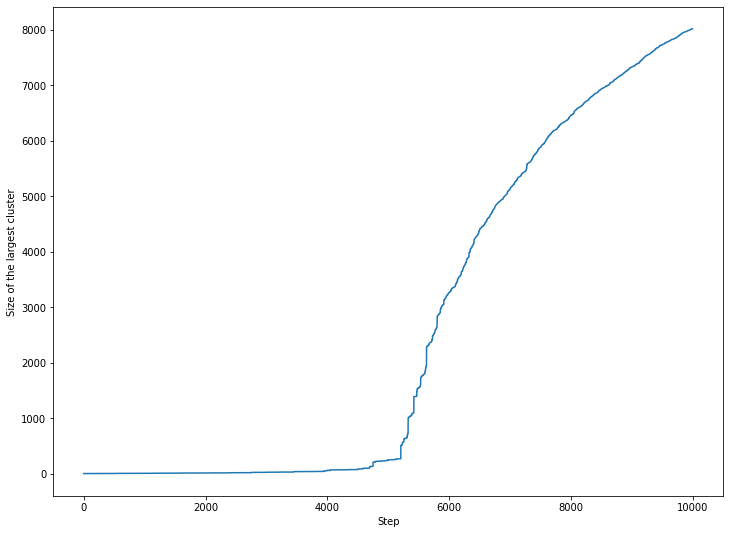

In [7]:
X=[]
Y=[]
original_size = len(unoccupied)
largest = 2

def findRoot(i):
    if ptrs[i] < 0 and ptrs[i] != -(N+1):     # if it is negative && added, then it's root
          return i;
    else:
          ptrs[i] = findRoot(ptrs[i]);        # find root and assign root through the way
          return ptrs[i]


for i in range(original_size):
      #print(i)
      #print(ptrs)
      if len(unoccupied) == 1:
            edge = unoccupied.pop()
            (fromm, to) = edge
      else:
            edge = random.sample(unoccupied,1)
            [(fromm, to)] = edge
            unoccupied.remove((fromm,to))
      #print("edge", str(edge))
      #print("fromm", str(fromm))
      #print("to", str(to))
      #print("pointers",str(ptrs))
      if (to,fromm) in unoccupied:
            unoccupied.remove((to,fromm))
      if to != fromm:
            if ptrs[fromm] == -(1+N):
                  ptrs[fromm] = -1
            if ptrs[to] == -(1+N):
                  ptrs[to] = -1
            fromm_root = findRoot(fromm)
            #print("fromm_root", str(fromm_root))
            to_root = findRoot(to)
            #print("to_root", str(to_root))
            if fromm_root != to_root:       
                  fromm_size = ptrs[fromm_root]
                  ptrs[to_root] += ptrs[fromm_root]
                  ptrs[fromm_root] = to_root
            #print("pointers",str(ptrs))
            if -ptrs[to_root] > largest:
                largest = -ptrs[to_root]
      #print(unoccupied)
      X += [i,]
      Y += [largest, ]
      if len(unoccupied) == 0:
            break

#print(X)
#print(Y)
fig= plt.figure(figsize=(12,9))
plt.plot(X, Y, '-')
plt.xlabel("Step")
plt.ylabel("Size of the largest cluster")
#plt.title("N = 10^")
plt.show()
